In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = "data/metadata/airtable_records.csv"
df = pd.read_csv(file_path)


Count of occurrences by Category:
                                            Category  Count
0  Other acts of violence against a child not els...    110
1                               Composite phoenomena     85
2                  Physical violence against a child     85
3                    Sexual violence against a child     81
4             Psychological violence against a child     62
5                         Violent killing of a child     17
6                                 Neglect of a child      3


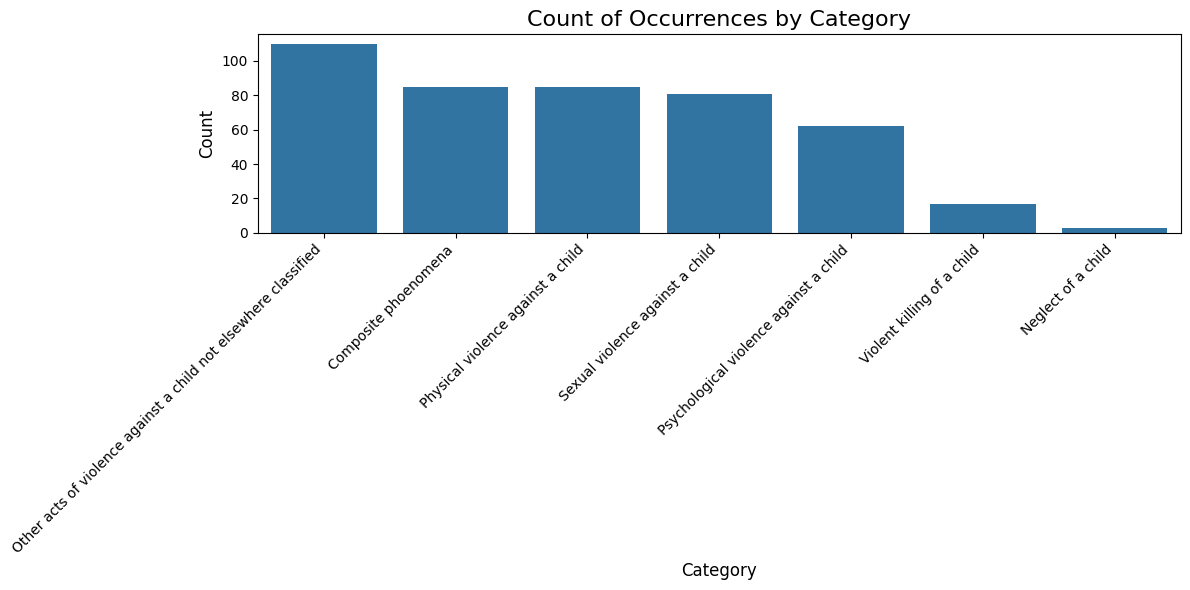

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 2: Split and explode 'Categories' to count occurrences by 'Category'
df['Category'] = df['Category'].str.split(', ')

# Explode 'Categories' column
df_category = df.explode('Category')  # Explode 'Categories' only

# Group by 'Category' and count occurrences
data_type_by_category = df_category['Category'].value_counts().reset_index(name='Count')
data_type_by_category.columns = ['Category', 'Count']

# Display the count of occurrences by 'Category'
print("\nCount of occurrences by Category:")
print(data_type_by_category)
data_type_by_category.to_csv('data/metadata/category.csv', index=False)

# Set up the figure for the bar chart
plt.figure(figsize=(12, 6))

# Create a bar chart with 'Categories' on x-axis and 'Count' on y-axis
sns.barplot(x='Category', y='Count', data=data_type_by_category)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Count of Occurrences by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Ensure the directory exists before saving the plot
os.makedirs('data/metadata', exist_ok=True)

# Save the plot to a file
plt.tight_layout()
plt.savefig('data/metadata/category.png')

# Show the plot
plt.show()



In [6]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = "data/metadata/airtable_records.csv"
df = pd.read_csv(file_path)

# Step 1: Clean up 'Categories' and 'DataType' columns by removing brackets
df['Category'] = df['Category'].str.replace(r"[\[\]]", "", regex=True)
df['DataType'] = df['DataType'].str.replace(r"[\[\]]", "", regex=True)

# Step 2: Split and explode 'Categories' and 'DataType' to count occurrences of 'DataType' by 'Category'
df['Category'] = df['Category'].str.split(', ')
df['DataType'] = df['DataType'].str.split(', ')

# Explode 'Categories' and 'DataType' columns one at a time
df_category = df.explode('Category')  # Explode 'Categories' only
df_data_type = df_category.explode('DataType')  # Explode 'DataType' after 'Categories'

# Group by 'Categories' and count occurrences of 'DataType'
data_type_by_category = df_data_type.groupby('Category')['DataType'].value_counts().reset_index(name='Count')

# Display the count of 'DataType' by 'Category'
print("\nCount of DataType by Category:")
print(data_type_by_category)

# Save the results to a CSV file
data_type_by_category.to_csv('data/metadata/type_by_category.csv', index=False)



Count of DataType by Category:
                                             Category          DataType  Count
0                                Composite phoenomena  'Administrative'     47
1                                Composite phoenomena          'Survey'     33
2                                Composite phoenomena       'Ombudsman'      1
3                                  Neglect of a child  'Administrative'      2
4                                  Neglect of a child          'Survey'      1
5   Other acts of violence against a child not els...  'Administrative'     76
6   Other acts of violence against a child not els...          'Survey'     29
7   Other acts of violence against a child not els...         'Hotline'      1
8   Other acts of violence against a child not els...       'Ombudsman'      1
9                   Physical violence against a child          'Survey'     64
10                  Physical violence against a child  'Administrative'     17
11                  

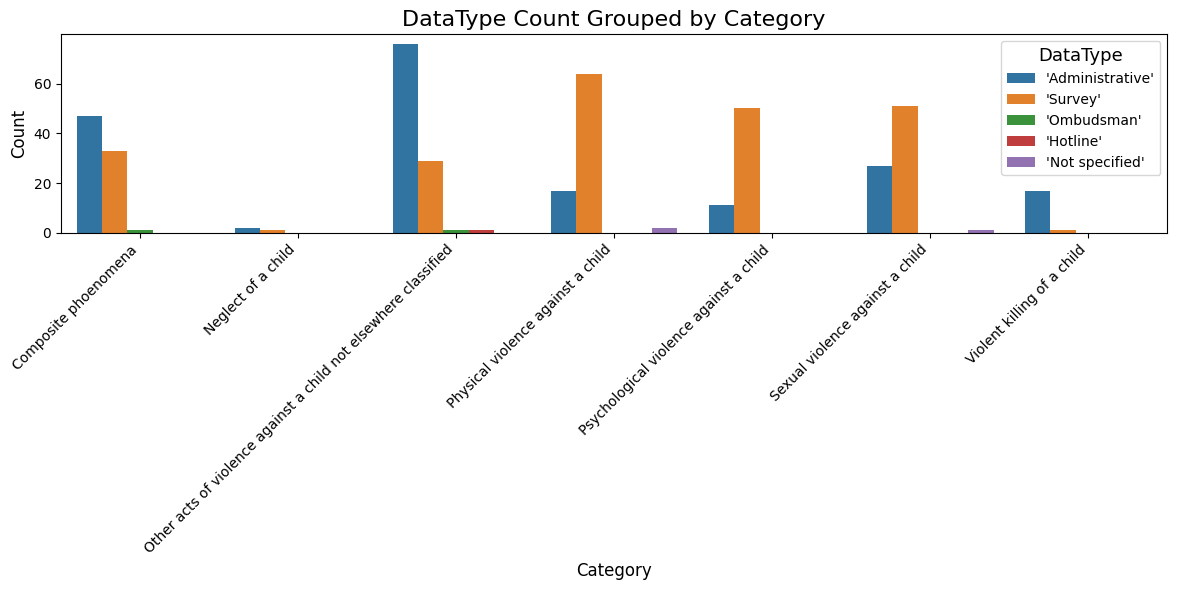

In [7]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for the grouped bar chart
plt.figure(figsize=(12, 6))

# Create a grouped bar chart with 'Categories' on x-axis and 'Count' on y-axis, with different bars for each 'DataType'
sns.barplot(x='Category', y='Count', hue='DataType', data=data_type_by_category)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('DataType Count Grouped by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add a legend title
plt.legend(title='DataType', title_fontsize='13')

# Ensure the directory exists before saving the plot
os.makedirs('data/metadata', exist_ok=True)

# Save the plot to a file
plt.tight_layout()
plt.savefig('data/metadata/type_by_category.png')

# Show the plot
plt.show()


In [8]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = "data/metadata/airtable_records.csv"
df = pd.read_csv(file_path)

# Step 3: Split and explode 'Categories' and 'Country' to count occurrences of 'Country' by 'Category'
df['Country'] = df['Country'].str.split(', ')

# Use the original DataFrame and explode 'Categories' and 'Country'
df_category_country = df.explode('Category')  # Explode 'Categories' only
df_country = df_category_country.explode('Country')  # Explode 'Country' after 'Categories'

# Group by 'Categories' and count occurrences of 'Country'
country_by_category = df_country.groupby('Category')['Country'].value_counts().reset_index(name='Count')

# Display the count of 'Country' by 'Category'
print("\nCount of Country by Category:")
print(country_by_category)
country_by_category.to_csv('data/metadata/country_by_category.csv', index=False)



Count of Country by Category:
                                              Category  \
0                                 Composite phoenomena   
1                                 Composite phoenomena   
2                                 Composite phoenomena   
3                                 Composite phoenomena   
4                                 Composite phoenomena   
..                                                 ...   
421  Violent killing of a child, Physical violence ...   
422  Violent killing of a child, Physical violence ...   
423  Violent killing of a child, Psychological viol...   
424  Violent killing of a child, Sexual violence ag...   
425  Violent killing of a child, Sexual violence ag...   

                                               Country  Count  
0                                              Albania     25  
1                                              Croatia     24  
2                                            Lithuania     21  
3               

In [9]:
# Overall occurrences of 'DataType'
if 'DataType' in df.columns:
    df_data_type_exploded = df.explode('DataType')  # Explode only 'DataType' column
    print("\nOverall occurrences of DataType:")
    print(df_data_type_exploded['DataType'].value_counts())

# Overall occurrences of 'Categories'
if 'Categories' in df.columns:
    df_category_exploded = df.explode('Categories')  # Explode only 'Categories' column
    print("\nOverall occurrences of Categories:")
    print(df_category_exploded['Categories'].value_counts())

# Overall occurrences of 'StatisticalUnit'
if 'StatisticalUnit' in df.columns:
    df_statistical_unit_exploded = df.explode('StatisticalUnit')  # Explode only 'StatisticalUnit' column
    print("\nOverall occurrences of StatisticalUnit:")
    print(df_statistical_unit_exploded['StatisticalUnit'].value_counts())

# Overall occurrences of 'Country'
if 'Country' in df.columns:# Load the CSV file into a DataFrame
file_path = "data/metadata/airtable_records.csv"
df = pd.read_csv(file_path)

import geopandas as gpd
import ast

# Step 1: Clean and explode 'ISO3' column to handle multiple values per row
df_iso_exploded = df.copy()
df_iso_exploded['ISO3'] = df_iso_exploded['ISO3'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_iso_exploded = df_iso_exploded.explode('ISO3')
df_iso_exploded['ISO3'] = df_iso_exploded['ISO3'].str.strip("[]'")

# Step 2: Aggregate counts by country
df_country = df_iso_exploded['ISO3'].value_counts().reset_index()
df_country.columns = ['ISO3', 'Count']

# Load a world map using GeoPandas
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
# Focus on Europe and Central Asia by limiting the coordinates (bounding box)
bbox = (-.50, 20.0, 1000.0, 75.0)  # (minx, miny, maxx, maxy) covering Europe and Central Asia
world = world.cx[bbox[0]:bbox[2], bbox[1]:bbox[3]]
# Merge the country data with the world map
df_country_map = world.merge(df_country, how='left', left_on='ISO_A3_EH', right_on='ISO3')

# Set up the figure for the shaded map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the map with shading based on the 'Count' column
df_country_map.plot(column='Count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add title
plt.title('Shaded Map of Country Data', fontsize=16)

# Show the plot
plt.tight_layout()
plt.savefig('data/metadata/country_coverage.png')
plt.show()

    df_country_exploded = df.explode('Country')  # Explode only 'Country' column
    print("\nOverall occurrences of Country:")
    print(df_country_exploded['Country'].value_counts())


Overall occurrences of DataType:
DataType
['Survey']                      165
['Administrative']              154
['Ombudsman']                     2
['Not specified']                 2
['Hotline']                       1
['Administrative', 'Survey']      1
Name: count, dtype: int64

Overall occurrences of StatisticalUnit:
StatisticalUnit
['Rate']              172
['Victim']             83
['Cases']              47
['Measure']             5
['Perpetrators']        4
['Act']                 4
['Rate', 'Victim']      3
['Victim', 'Rate']      2
['Cases', 'Rate']       1
Name: count, dtype: int64

Overall occurrences of Country:
Country
Croatia                                                 78
Lithuania                                               52
United Kingdom of Great Britain and Northern Ireland    44
Bulgaria                                                43
Ukraine                                                 42
Armenia                                                 42
Alb

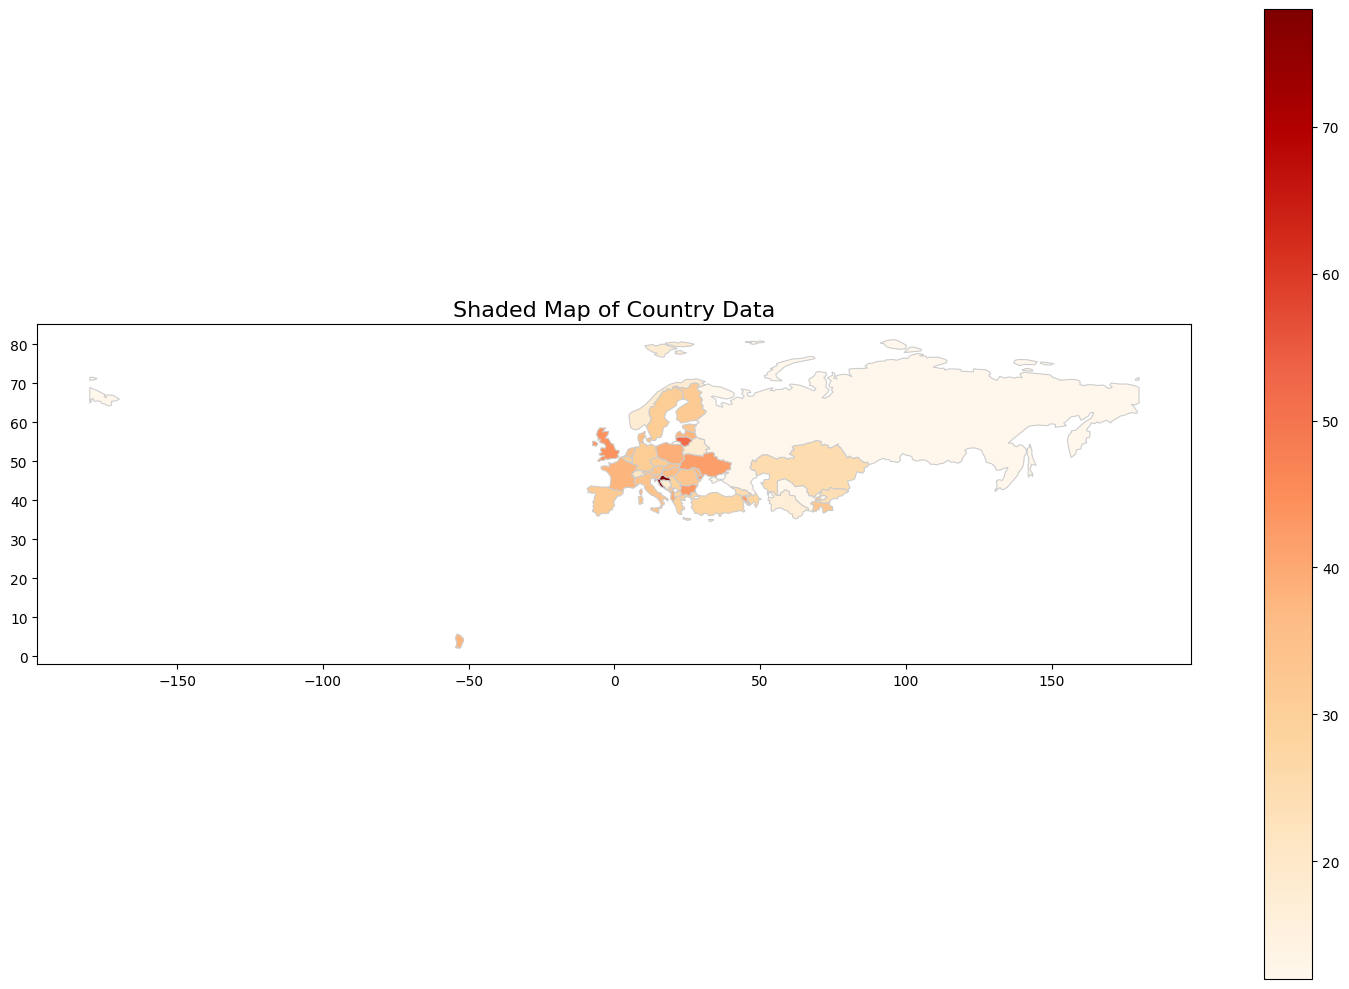

In [14]:
# Load the CSV file into a DataFrame
file_path = "data/metadata/airtable_records.csv"
df = pd.read_csv(file_path)

import geopandas as gpd
import ast

# Step 1: Clean and explode 'ISO3' column to handle multiple values per row
df_iso_exploded = df.copy()
df_iso_exploded['ISO3'] = df_iso_exploded['ISO3'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_iso_exploded = df_iso_exploded.explode('ISO3')
df_iso_exploded['ISO3'] = df_iso_exploded['ISO3'].str.strip("[]'")

# Step 2: Aggregate counts by country
df_country = df_iso_exploded['ISO3'].value_counts().reset_index()
df_country.columns = ['ISO3', 'Count']

# Load a world map using GeoPandas
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
# Focus on Europe and Central Asia by limiting the coordinates (bounding box)
bbox = (-.50, 20.0, 1000.0, 75.0)  # (minx, miny, maxx, maxy) covering Europe and Central Asia
world = world.cx[bbox[0]:bbox[2], bbox[1]:bbox[3]]
# Merge the country data with the world map
df_country_map = world.merge(df_country, how='left', left_on='ISO_A3_EH', right_on='ISO3')

# Set up the figure for the shaded map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the map with shading based on the 'Count' column
df_country_map.plot(column='Count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add title
plt.title('Shaded Map of Country Data', fontsize=16)

# Show the plot
plt.tight_layout()
plt.savefig('data/metadata/country_coverage.png')
plt.show()



In [15]:
data_type_by_category

,Category,DataType,Count
0,Composite phoenomena,'Administrative',47
1,Composite phoenomena,'Survey',33
2,Composite phoenomena,'Ombudsman',1
3,Neglect of a child,'Administrative',2
4,Neglect of a child,'Survey',1
5,Other acts of violence against a child not els...,'Administrative',76
6,Other acts of violence against a child not els...,'Survey',29
7,Other acts of violence against a child not els...,'Hotline',1
8,Other acts of violence against a child not els...,'Ombudsman',1
9,Physical violence against a child,'Survey',64


In [16]:
world

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
5,Admin-0 country,1,3,Kazakhstan,KA1,1,1,Sovereignty,1,Kazakhstan,...,None,None,None,None,None,None,None,None,None,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,Admin-0 country,1,3,Uzbekistan,UZB,0,2,Sovereign country,1,Uzbekistan,...,None,None,None,None,None,None,None,None,None,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
14,Admin-0 country,1,3,Sudan,SDN,0,2,Sovereign country,1,Sudan,...,None,None,None,None,None,None,None,None,None,"POLYGON ((24.56737 8.22919, 23.80581 8.66632, ..."
15,Admin-0 country,1,3,Chad,TCD,0,2,Sovereign country,1,Chad,...,None,None,None,None,None,None,None,None,None,"POLYGON ((23.83766 19.58047, 23.88689 15.61084..."
18,Admin-0 country,1,2,Russia,RUS,0,2,Sovereign country,1,Russia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((178.7253 71.0988, 180 71.51571..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Admin-0 country,1,5,Bosnia and Herzegovina,BIH,0,2,Sovereign country,1,Bosnia and Herzegovina,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.56 42.65, 17.67492 43.02856, 17.2..."
171,Admin-0 country,1,6,North Macedonia,MKD,0,2,Sovereign country,1,North Macedonia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((22.38053 42.32026, 22.88137 41.9993,..."
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,..."


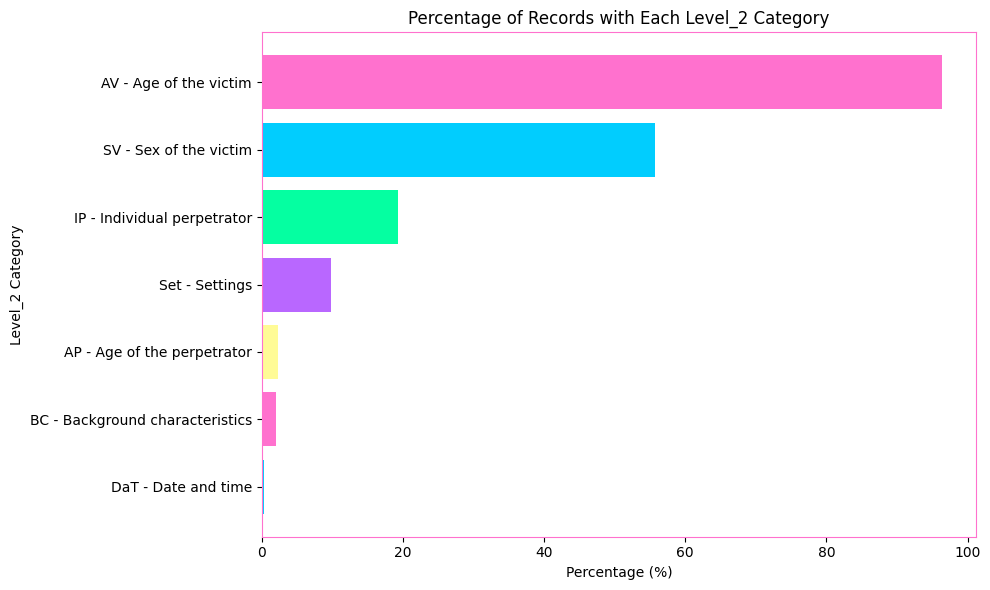

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = "data/metadata/airtable_records.csv"
df = pd.read_csv(file_path)

# Split the 'Level_2' column by commas and explode into individual rows
df['Level_2'] = df['Level_2'].str.split(',')
df_level2_exploded = df.explode('Level_2')

# Strip whitespace from values in the 'Level_2' column after exploding
df_level2_exploded['Level_2'] = df_level2_exploded['Level_2'].str.strip()

# Recalculate the occurrences of each value in 'Level_2' after flattening
level2_counts_flattened = df_level2_exploded['Level_2'].value_counts()

level2_counts_flattened

# Calculate the percentage of each 'Level_2' category
total_records = 336
level2_percentages = (level2_counts_flattened / total_records) * 100

# Create a horizontal bar chart for the 'Level_2' percentages with vaporwave colors and black labels
plt.figure(figsize=(10, 6))
vaporwave_colors = ['#ff71ce', '#01cdfe', '#05ffa1', '#b967ff', '#fffb96']
plt.barh(level2_percentages.index, level2_percentages.values, color=vaporwave_colors * (len(level2_percentages) // len(vaporwave_colors) + 1))
plt.xlabel('Percentage (%)', color='black')
plt.ylabel('Level_2 Category', color='black')
plt.title('Percentage of Records with Each Level_2 Category', color='black')
plt.gca().invert_yaxis()  # To display the highest percentage on top
plt.gca().spines['bottom'].set_color('#ff71ce')
plt.gca().spines['top'].set_color('#ff71ce') 
plt.gca().spines['right'].set_color('#ff71ce')
plt.gca().spines['left'].set_color('#ff71ce')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.tight_layout()
plt.savefig('data/metadata/level_2.png')
# Show the plot
plt.show()

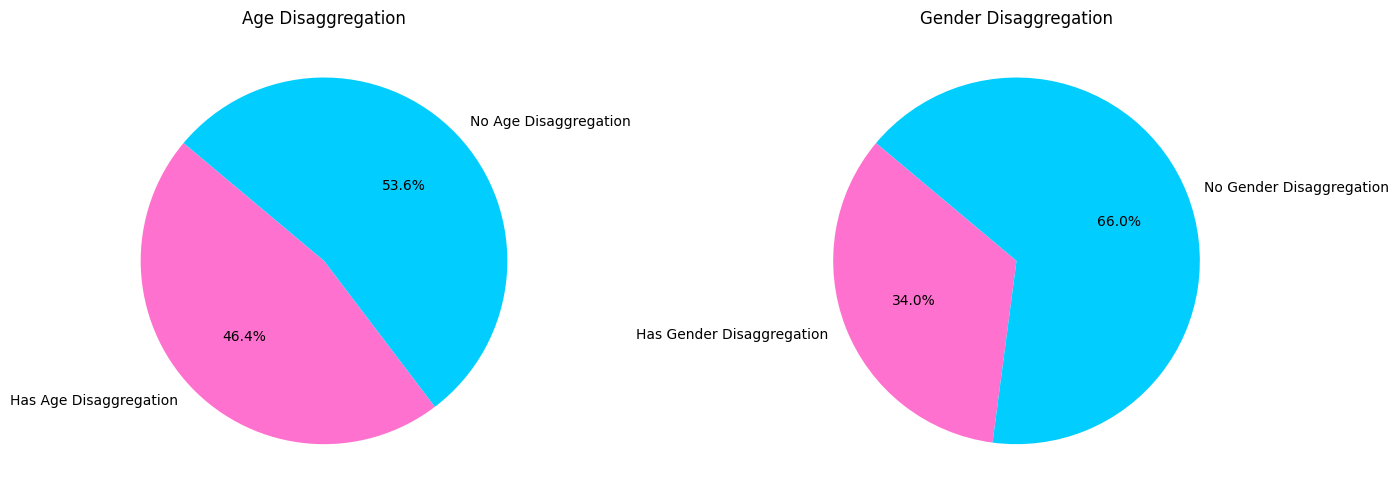

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = "data/metadata/airtable_records.csv"
df = pd.read_csv(file_path)

# Define the total number of records
total_records = len(df)

# Calculate the percentage of records with 'AgeDisaggregation' and 'GenderDisaggregation'
# Count the number of records with non-null values in 'AgeDisaggregation' and 'GenderDisaggregation'
age_disaggregation_count = df['AgeDisaggregation'].notna().sum()
gender_disaggregation_count = df['GenderDisaggregation'].notna().sum()

# Calculate the percentages
age_disaggregation_percentage = (age_disaggregation_count / total_records) * 100
gender_disaggregation_percentage = (gender_disaggregation_count / total_records) * 100

# Create pie charts for both 'AgeDisaggregation' and 'GenderDisaggregation'
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Colors for the pie charts
colors = ['#ff71ce', '#01cdfe']

# Age Disaggregation Pie Chart
axes[0].pie([age_disaggregation_percentage, 100 - age_disaggregation_percentage], 
             labels=['Has Age Disaggregation', 'No Age Disaggregation'],
             autopct='%1.1f%%', colors=colors, startangle=140)
axes[0].set_title('Age Disaggregation', color='black')

# Gender Disaggregation Pie Chart
axes[1].pie([gender_disaggregation_percentage, 100 - gender_disaggregation_percentage], 
             labels=['Has Gender Disaggregation', 'No Gender Disaggregation'],
             autopct='%1.1f%%', colors=colors, startangle=140)
axes[1].set_title('Gender Disaggregation', color='black')

# Set layout and show the plot
plt.tight_layout()
plt.savefig('data/metadata/disaggregations.png')
plt.show()

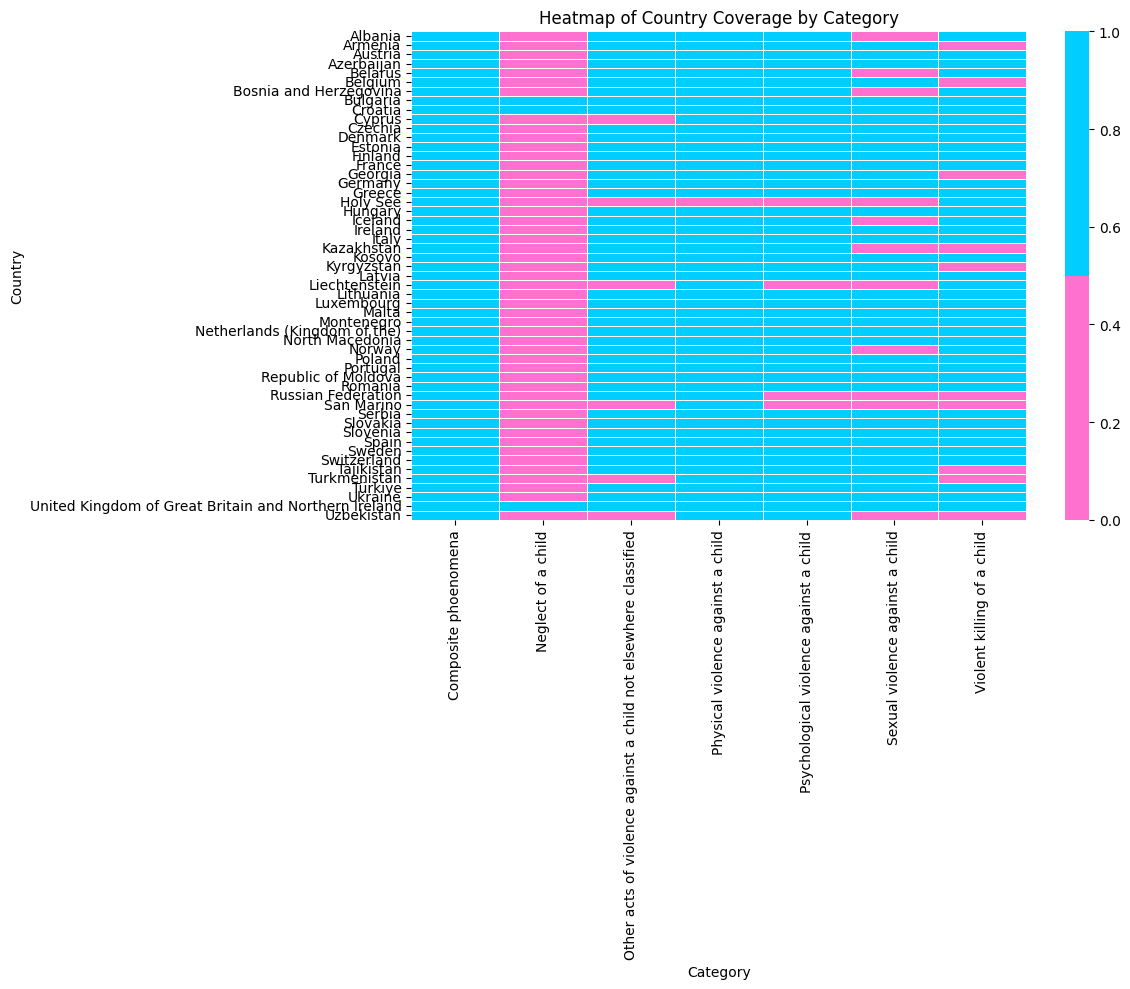

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
file_path = "data/metadata/airtable_records.csv"
df = pd.read_csv(file_path)

# Flatten the 'Country' and 'Category' columns by splitting and exploding
df['Country'] = df['Country'].str.split(',')
df['Category'] = df['Category'].str.split(',')

df_flattened = df.explode('Country').explode('Category')

# Strip whitespace from 'Country' and 'Category' values
df_flattened['Country'] = df_flattened['Country'].str.strip()
df_flattened['Category'] = df_flattened['Category'].str.strip()

# Create a pivot table for the heatmap (1 if country-category pair exists, 0 otherwise)
heatmap_data = df_flattened.pivot_table(index='Country', columns='Category', aggfunc='size', fill_value=0)
heatmap_data[heatmap_data > 0] = 1

# Plotting the heatmap with vaporwave colors
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap=['#ff71ce', '#01cdfe'], cbar=True, linewidths=.5)
plt.title('Heatmap of Country Coverage by Category', color='black')
plt.xlabel('Category', color='black')
plt.ylabel('Country', color='black')
plt.tight_layout()
plt.savefig('data/metadata/heatmap.png')

# Show the plot
plt.show()

